In [1]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pandas as pd




In [2]:
data = pd.read_csv("data.csv")

In [11]:
U = 5
h = 0.1488
R = 0.015
a = np.sqrt(h**2 - R**2)
print ("a = ", a)
# Create columns
u = np.arange(0.5, 5, 0.5).reshape(-1, 1)
ld = np.zeros((9,1)) 
xs = np.zeros((9,1))  
r = np.zeros((9,1))  

# Concatenate the columns to form a new array
new_array = np.hstack(( u, ld, xs, r))
def update_cols(arr):
    arr[:, 1] = np.exp (( arr[:, 0] - U/2)/U * 2*np.log((h+a)/R))
    arr[:, 2] = a * (arr[:, 1]**2 +1)/(arr[:, 1]**2 -1) *100
    arr[:, 3] = np.sqrt((arr[:, 2]/100)**2 - a**2)*100
    return arr

new_array = update_cols(new_array)
print(new_array)
df = pd.DataFrame(new_array, columns=[ 'U', 'lambda', 'xs[cm]', 'r[cm]'])

############################################
start = 2.45
end = 2.551
step = 0.001
u = np.arange(start, end, step).reshape(-1, 1)
zbytek = np.zeros((len(u),3)) 
convarray = np.hstack(( u, zbytek))

convarray = update_cols(convarray)
convarray[50] = [0, 1, 0, 0]

df2 = pd.DataFrame(convarray, columns=[ 'U', 'lambda', 'xs[cm]', 'r[cm]'])
df2 = pd.concat([df2], ignore_index=True)
print(df2)


# Add a header row with labels
df_with_header = pd.concat([ df], ignore_index=True)

print(df_with_header)



a =  0.14804202106158912
[[  0.5          0.09180212 -15.05585156   2.74121618]
 [  1.           0.16677829 -15.65132251   5.07932044]
 [  1.5          0.30298864 -17.79706774   9.87781455]
 [  2.           0.55044404 -27.67488229  23.38235895]
 [  2.5          1.                  inf          inf]
 [  3.           1.81671509  27.67488229  23.38235895]
 [  3.5          3.30045373  17.79706774   9.87781455]
 [  4.           5.9959841   15.65132251   5.07932044]
 [  4.5         10.89299481  15.05585156   2.74121618]]
         U    lambda      xs[cm]       r[cm]
0    2.450  0.942044 -248.258683  247.816886
1    2.451  0.943170 -253.313287  252.880321
2    2.452  0.944297 -258.578745  258.154610
3    2.453  0.945425 -264.068515  263.653212
4    2.454  0.946554 -269.797227  269.390756
..     ...       ...         ...         ...
96   2.546  1.056463  269.797227  269.390756
97   2.547  1.057725  264.068515  263.653212
98   2.548  1.058989  258.578745  258.154610
99   2.549  1.060254  253.313

C:\Users\teodd\AppData\Local\Temp\ipykernel_10744\896202200.py:16: RuntimeWarning: divide by zero encountered in divide
  arr[:, 2] = a * (arr[:, 1]**2 +1)/(arr[:, 1]**2 -1) *100


C:\Users\teodd\AppData\Local\Temp\ipykernel_10744\3954383723.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)  # Get a colormap with 10 distinct colors
c:\anaconda3\Lib\site-packages\matplotlib\transforms.py:2058: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 1] *= sx
c:\anaconda3\Lib\site-packages\matplotlib\transforms.py:2059: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 2] *= sx
c:\anaconda3\Lib\site-packages\matplotlib\transforms.py:2060: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[1, 0] *= sy
c:\anaconda3\Lib\site-packages\matplotlib\transforms.py:2062: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[1, 2] *= sy


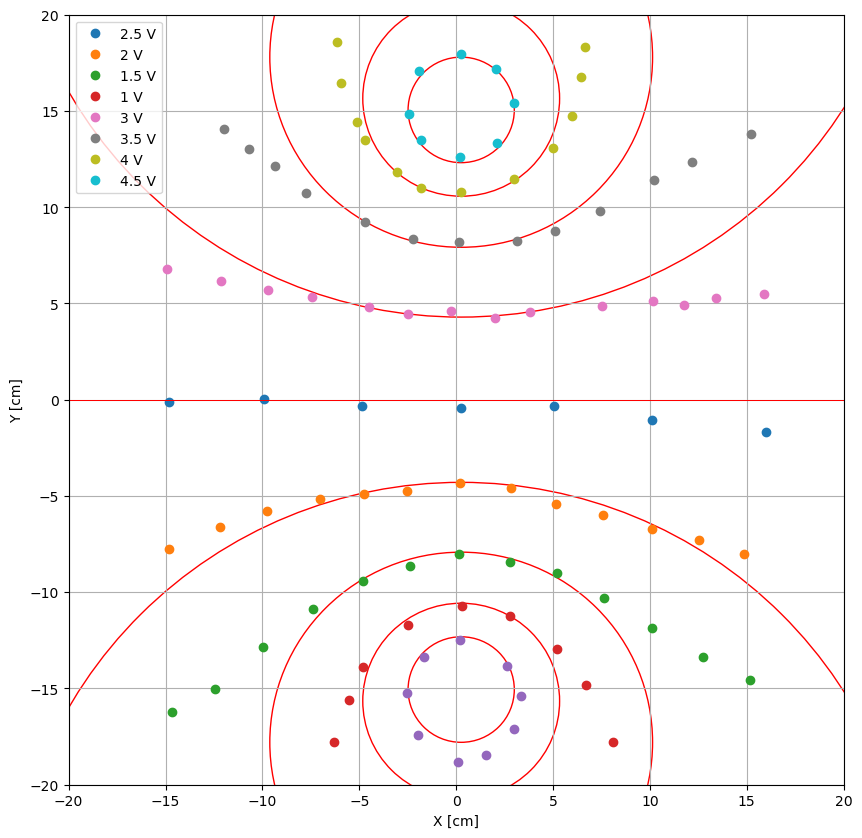

In [15]:
# the first column is 'label', the second column is 'x', and the third column is 'y'
label_column = data.columns[0]
x_column = data.columns[1]
y_column = data.columns[2]
center_y_column = df_with_header.columns[2]
radius_column = df_with_header.columns[3]

# Define a color map
colors = plt.cm.get_cmap('tab10', 10)  # Get a colormap with 10 distinct colors

# Plotting the data
plt.figure(figsize=(10, 10))
hladiny = ["2.5 V", "2 V", "1.5 V", "1 V","", "0.5 V", "3 V", "3.5 V", "4 V", "4.5 V"]

# Group the data by the label column and plot each group with a different color
for label, group in data.groupby(label_column):
    plt.plot(group[x_column], group[y_column], marker='o', linestyle='None', color=colors(label), label=hladiny[label])


# Add circles to the plot using data from df_with_header
ax = plt.gca()  # Get the current axes
for _, row in df_with_header.iterrows():
    circle = patches.Circle((0.26, row[center_y_column]), row[radius_column], edgecolor='r', facecolor='none')
    ax.add_patch(circle)

    plt.axhline(y=0, color='r', linestyle='-', linewidth=0.6)

    
# Customize the plot
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.xlabel('X [cm]')  
plt.ylabel('Y [cm]')  
plt.legend()
plt.grid(True)

plt.savefig('plot_high_res.png', format='png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [ ]:

############################################



center_y_column = df2.columns[2]
radius_column = df2.columns[3]




# Create multiple graphs, each plotting just two circles
num_rows = len(df2)

for i in range(num_rows//2):
    plt.figure(figsize=(10, 10))
    
    # Add two circles to the plot using data from df_with_header
    ax = plt.gca()  # Get the current axes
    indices = [i, num_rows-1 - i]
    for idx in indices:
        row = df2.iloc[idx]  # Use iloc to access rows by integer-location based index
        circle = patches.Circle((0, row[center_y_column]), row[radius_column], edgecolor='r', facecolor='none')
        ax.add_patch(circle)

    # Customize the plot
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    plt.xlabel('X [cm]')  # Corrected column name
    plt.ylabel('Y [cm]')  
    plt.legend([f'U = ± {df2.iloc[indices[0], 0]:.3f}V'])
    plt.grid(True)
    
    # Save the plot as a high-resolution image
    plt.savefig(f'plot_{i}.png', format='png', dpi=300, bbox_inches='tight')
    
    # Show the plot (optional, can be commented out if not needed)
    #plt.show()
    
    # Close the plot to free up memory
    plt.close()
